In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline 

In [100]:
amsterdam_weekdays = pd.read_csv('CombinedCityDATA.csv')
####################
# DATA CLEANING
# 1. need to change all bools to 0 and 1
# 2. change room_type to entire room/apt
# 3. Changing city names
# 3. Delete Unecessary stuff
# 4. Maximum 'realSum' is 4000
####################

amsterdam_weekdays.dtypes
#amsterdam_weekdays.room_type

#1. changing booleans
amsterdam_weekdays['room_shared'] = amsterdam_weekdays['room_shared'].astype(int)
amsterdam_weekdays['room_private'] = amsterdam_weekdays['room_private'].astype(int)
amsterdam_weekdays['host_is_superhost'] = amsterdam_weekdays['host_is_superhost'].astype(int)

#2. room_type
amsterdam_weekdays['room_type'] = amsterdam_weekdays['room_type'].apply(lambda x: 1 if x.strip().lower() == 'entire home/apt' else 0)
amsterdam_weekdays['room_type'].info

#3. changing City names

df = pd.DataFrame({
    'City': ['London', 'Paris', 'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'Rome', 'Vienna']
})

# apply one-hot encoding using get_dummies
one_hot_df = pd.get_dummies(amsterdam_weekdays['city'], prefix='City')

# concatenate the one-hot-encoded columns with the original DataFrame
amsterdam_weekdays = pd.concat([amsterdam_weekdays, one_hot_df], axis=1)

# drop the original 'City' column
amsterdam_weekdays.drop('city', axis=1, inplace=True)

print(df)



#3. Delete -> as it's just the serial number
del amsterdam_weekdays['Unnamed: 0']
del amsterdam_weekdays['lng']
del amsterdam_weekdays['lat']
del amsterdam_weekdays['City_Paris']


#4. Max price : 4000

maximum = amsterdam_weekdays['realSum'] > 4000
if any(maximum):
    amsterdam_weekdays = amsterdam_weekdays[~maximum]
    print("deleted 1")

print(amsterdam_weekdays.dtypes)

        City
0     London
1      Paris
2  Amsterdam
3     Athens
4  Barcelona
5     Berlin
6   Budapest
7     Lisbon
8       Rome
9     Vienna
deleted 1
realSum                       float64
room_type                       int64
room_shared                     int64
room_private                    int64
person_capacity                 int64
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
City_Amsterdam                  uint8
City_Athens                     uint8
City_Barcelona                  uint8
City_Berlin                     uint8
City_Budapest                   uint8
City_Lisbon

In [101]:
# RANDOM FOREST AND GRADIENT BOOSTED

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(
    amsterdam_weekdays.drop(columns=['realSum']),amsterdam_weekdays['realSum'], 
                                                                   test_size = 0.15, 
                                                                   random_state=1984)
X_train.info()
Y_test.head()

X_train.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22264 entries, 21451 to 20713
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_type                   22264 non-null  int64  
 1   room_shared                 22264 non-null  int64  
 2   room_private                22264 non-null  int64  
 3   person_capacity             22264 non-null  int64  
 4   host_is_superhost           22264 non-null  int64  
 5   multi                       22264 non-null  int64  
 6   biz                         22264 non-null  int64  
 7   cleanliness_rating          22264 non-null  int64  
 8   guest_satisfaction_overall  22264 non-null  int64  
 9   bedrooms                    22264 non-null  int64  
 10  dist                        22264 non-null  float64
 11  metro_dist                  22264 non-null  float64
 12  attr_index                  22264 non-null  float64
 13  attr_index_norm            

<bound method DataFrame.info of        room_type  room_shared  room_private  person_capacity  \
21451          0            0             1                2   
13384          0            0             1                2   
5042           0            0             1                2   
20897          1            0             0                2   
15121          1            0             0                5   
...          ...          ...           ...              ...   
5197           0            0             1                2   
10015          1            0             0                3   
1780           1            0             0                2   
5892           0            0             1                2   
20713          1            0             0                5   

       host_is_superhost  multi  biz  cleanliness_rating  \
21451                  0      0    1                   9   
13384                  0      0    0                  10   
5042               

In [102]:
#KNN
from sklearn.neighbors import KNeighborsRegressor # KNeighborsClassifier is the KNN machine learning algorithem
KNN = KNeighborsRegressor(n_neighbors=1000)
KNN.fit(X_train,Y_train)
# Predict using the trained model on the test data
y_pred = KNN.predict(X_test)

# Calculate R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print("R-squared value:", r2)


R-squared value: 0.10707648778564816


In [103]:
#RANDOMFORESTCLASSIFIER
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0, n_estimators=200)
forest.fit(X_train,Y_train)
y_pred = forest.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)

0.6282733852318634


score of gbtree in training data is 0.5884251669106131
score of gbtree in testing data is 0.6048215409394773


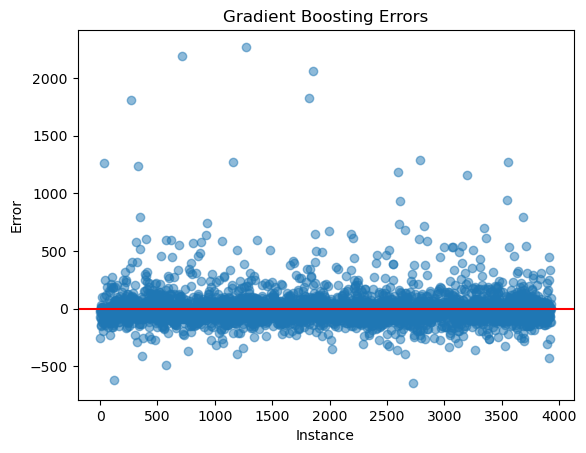

In [109]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbtree = GradientBoostingRegressor(learning_rate=0.2, max_depth=2, random_state=1984)
gbtree.fit(X_train,Y_train)
gbtree_score_test=gbtree.score(X_test, Y_test)
gbtree_score_train=gbtree.score(X_train, Y_train)
print ("score of gbtree in training data is " + str(gbtree_score_train))
print ("score of gbtree in testing data is " + str(gbtree_score_test))
import matplotlib.pyplot as plt

# Gene
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = gbtree.predict(X_test)

# Calculate the errors as the difference between the true and predicted prices
errors = Y_test - y_pred

# Create a scatter plot of the errors
plt.scatter(range(len(errors)), errors, alpha=0.5)

# Add a horizontal line at y=0 to indicate zero error
plt.axhline(y=0, color='r', linestyle='-')

# Add axis labels and a title
plt.xlabel('Instance')
plt.ylabel('Error')
plt.title('Gradient Boosting Errors')

# Display the plot
plt.show()


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor( random_state=1984)
tree.fit(X_train, Y_train)

train_score = tree.score(X_train, Y_train)
test_score = tree.score(X_test, Y_test)
print ("The score of the DT model in training dataset is equal to: "+str(train_score))
print ("The score of the DT model in testing dataset is equal to: "+str(test_score))

In [62]:
# Linear Regression

from sklearn.linear_model import LinearRegression 
OLS = LinearRegression()
OLS.fit(X_train, Y_train)
#display the intercept and coefficient
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, Y_train)))

 the intercept is -103.62001596651714
 the coeffiients are [ 1.03711503e+02 -9.47178067e+01 -8.99369616e+00  2.93626756e+01
 -9.20935359e-01  2.07091238e+01  3.80870812e+01  1.10308958e+01
  3.19103618e-01  7.41637967e+01 -2.80862905e-01 -8.23632111e+00
 -1.10940789e-01  7.11673818e+00  5.27383266e-02 -5.75727946e-01
  2.58231992e+02 -2.31226367e+02 -2.93073653e+01 -7.02170094e+01
 -2.01947532e+02 -1.04479025e+02 -3.13151455e+01 -1.54292043e+02
 -1.23590175e+02]
 the R_sqaured value is 0.47572736446906194


<Figure size 1000x500 with 0 Axes>

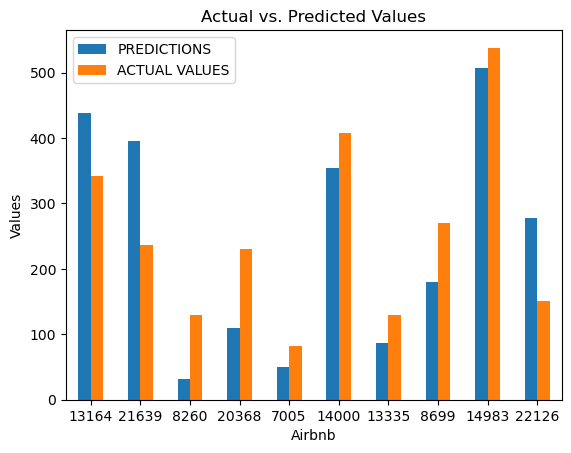

In [97]:
#predicting with OLS
y_pred = OLS.predict(X_test[-10:])

# Create a DataFrame with predicted and actual values for the last 10 rows
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':Y_test[-10:]})
#performance['error'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']

# Plot a bar graph of predicted and actual values for the last 10 rows
plt.figure(figsize=(10, 5))
performance.plot(kind='bar', title='Actual vs. Predicted Values', rot=0)
plt.xlabel('Airbnb')
plt.ylabel('Values')
plt.show()


<Figure size 1000x500 with 0 Axes>

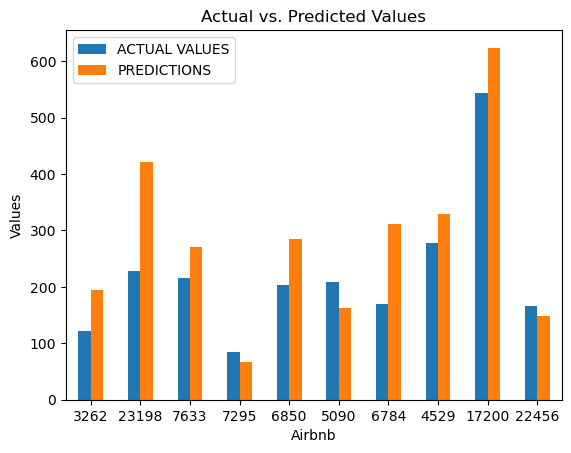

In [98]:
#predicting with OLS
y_pred = OLS.predict(X_test[:10])

# Create a DataFrame with predicted and actual values for the first 10 rows
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':Y_test[:10]})

# Calculate errors
performance['error'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']

# Plot a bar graph of predicted and actual values for the first 10 rows
plt.figure(figsize=(10, 5))
performance[['ACTUAL VALUES', 'PREDICTIONS']].plot(kind='bar', title='Actual vs. Predicted Values', rot=0)
plt.xlabel('Airbnb')
plt.ylabel('Values')

plt.show()


In [85]:
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':Y_test})
# Sort performance DataFrame by absolute error in ascending order
performance_sorted = performance.assign(abs_error=performance['error'].abs()).sort_values('abs_error')

# Select top 5 rows
top_5 = performance_sorted.head(5)

# Plot a bar graph of predicted and actual values for the top 5 rows
plt.figure(figsize=(10, 5))
top_5.plot(kind='bar', title='Actual vs. Predicted Values (Top 5)', rot=0)
plt.xlabel('Airbnb')
plt.ylabel('Values')
plt.show()


ValueError: array length 7 does not match index length 3929

In [65]:
#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()


,index,PREDICTIONS,ACTUAL VALUES,error
0,0,194.962945,121.856912,-73.106033
1,1,420.825325,228.882706,-191.942619
2,2,270.173803,215.725901,-54.447902
3,3,66.633652,84.363397,17.729745
4,4,285.416727,203.976124,-81.440602


In [69]:

import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()
nicer_OLS=sm.OLS(Y_train,X_train).fit()
nicer_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realSum   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     840.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:50:04   Log-Likelihood:            -1.4516e+05
No. Observations:               22264   AIC:                         2.904e+05
Df Residuals:                   22239   BIC:                         2.906e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -77.7150     11.449     -6.788      0.000    -100.156     -55.274
room_type                     77.8065      5.237     14.857      0.000      67.541      88.071
room_shared                 -120.6228     10.486    -11.504      0.000    -141.175    -100.070
room_private                 -34.8987      5.223     -6.682      0.000     -45.136     -24.661
person_capacity               29.3627      1.221     24.043      0.000      26.969      31.756
host_is_superhost             -0.9209      2.706     -0.340      0.734      -6.226       4.384
multi                         20.7091      2.836      7.303      0.000      15.151      26.267
biz                           38.0871      2.890     13.180      0.000      32.423      43.751
cleanliness_rating            11.0309      1.660      6.646      0.000       7.777      14.284
guest_satisfaction_overall     0.3191      0.182      1.750      0.080      -0.038       0.676
bedrooms                      74.1638      2.244     33.044      0.000      69.765      78.563
dist                          -0.2809      0.883     -0.318      0.750      -2.011       1.449
metro_dist                    -8.2363      1.649     -4.995      0.000     -11.469      -5.004
attr_index                    -0.1109      0.015     -7.239      0.000      -0.141      -0.081
attr_index_norm                7.1167      0.330     21.573      0.000       6.470       7.763
rest_index                     0.0527      0.007      7.873      0.000       0.040       0.066
rest_index_norm               -0.5757      0.162     -3.556      0.000      -0.893      -0.258
City_Amsterdam               258.2320      7.049     36.636      0.000     244.416     272.048
City_Athens                 -231.2264      6.784    -34.085      0.000    -244.523    -217.930
City_Barcelona               -29.3074      7.114     -4.120      0.000     -43.251     -15.364
City_Berlin                  -70.2170      7.278     -9.648      0.000     -84.482     -55.953
City_Budapest               -201.9475      5.836    -34.605      0.000    -213.386    -190.509
City_Lisbon                 -104.4790      5.607    -18.633      0.000    -115.470     -93.488
City_London                  -31.3151      5.922     -5.288      0.000     -42.924     -19.707
City_Rome                   -154.2920      6.344    -24.320      0.000    -166.727    -141.857
City_Vienna                 -123.5902      6.377    -19.380      0.000    -136.090    -111.090
==============================================================================
Omnibus:                    26318.654   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5568216.397
Skew:                           6.073   Prob(JB):                         0.00
Kurtosis:   